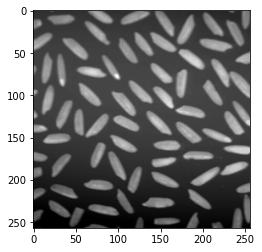

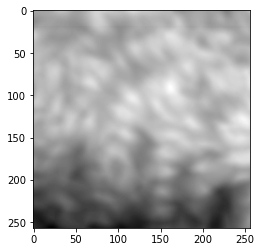

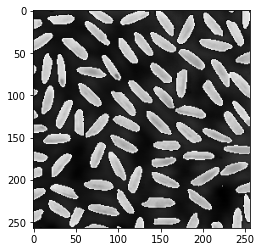

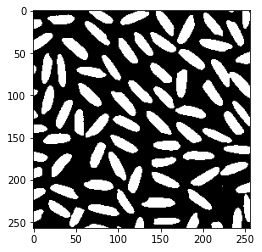

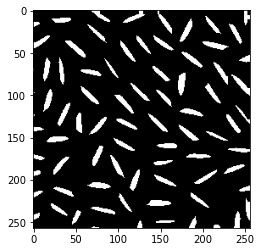

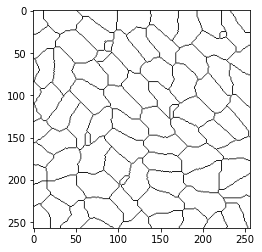

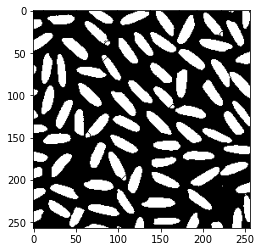

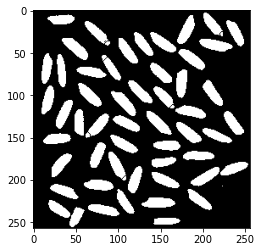

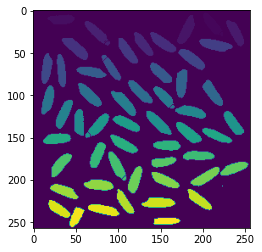

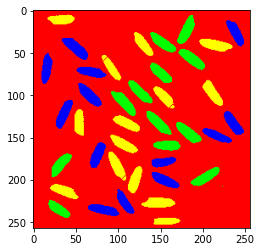

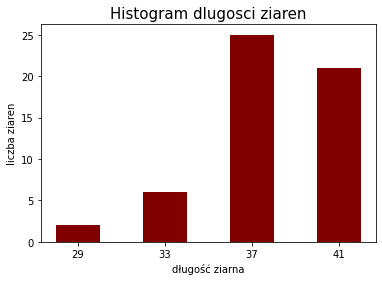

In [398]:
import numpy as np
import cv2
from skimage.morphology import disk, ball
from skimage.filters import threshold_mean
from skimage.filters.rank import maximum,mean
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray,label2rgb
from skimage.segmentation import watershed,clear_border
from skimage.feature import peak_local_max
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
img=io.imread('rice.gif',as_gray=True)
img=img[5:262,26:282]
plt.imshow(img,cmap='gray')
plt.show()
tlo=mean(img, disk(19))
plt.imshow(tlo,cmap='gray')
plt.show()
img2=tlo-img
plt.imshow(img2,cmap='gray')
plt.show()
# fig,ax = try_all_threshold(img2,figsize=(10,8),verbose=True)
# plt.show()
thresh_min=threshold_mean(img2)
binary_min = (img2 > thresh_min).astype(np.int8)*255
plt.imshow(binary_min,cmap='gray')
plt.show()
kernel = np.ones((6, 5), np.uint8)
imger=cv2.erode(binary_min, kernel, iterations=1)
plt.imshow(imger,cmap='gray')
plt.show()
thresh=(imger/255).astype(np.int8)
distance = ndi.distance_transform_edt(imger)
mask = np.zeros(distance.shape, dtype=bool)
mask[imger>10] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers,watershed_line=True,compactness=0)
labels[labels!=0]=255
plt.imshow(labels,cmap='gray')
plt.show()
result=(labels*binary_min).astype(np.int8)*255
cleaned=clear_border(result)
plt.imshow(result,cmap='gray')
plt.show()
plt.imshow(cleaned,cmap='gray')
plt.show()
imgl=label(cleaned)
plt.imshow(imgl)
plt.show()
regions = regionprops(imgl)
colors1=[(1,0,0),(1,1,0),(0,1,0),(0,0,1)]
label2=label2rgb(imgl,bg_color=(1,0,0),colors=colors1)
plt.imshow(label2)
plt.show()
lengths=[region.axis_major_length for region in regions]
hist, bin_edges = np.histogram(lengths,bins=[0,29,33,37 ,41])
bin_edges=np.around(bin_edges)
plt.bar(bin_edges[1:],hist, color ='maroon',width = 2,align='center')
plt.xticks(bin_edges[1:])
plt.title('Histogram dlugosci ziaren',fontsize = 15)
plt.xlabel('długość ziarna')
plt.ylabel('liczba ziaren')
plt.show()
# plt.hist(lengths, bins='auto')
# plt.show()